In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Clases y demás

## Encontrar las veces que se repite un personaje

### Una clase para ver cuántas líneas de diálogo tienen los 10 personajes más repetidos

In [3]:
class ContadorPersonajesRepetidos:
    def __init__(self, dataset_path):
        self.dataset = pd.read_csv(dataset_path)

    def contar_personajes_repetidos(self, num_personajes=10):
        # Contar la frecuencia de los personajes
        frecuencia_personajes = self.dataset['character'].value_counts()

        # Seleccionar los quince personajes más repetidos
        quince_personajes_mas_repetidos = frecuencia_personajes.head(num_personajes)

        # Crear un nuevo DataFrame con los quince personajes y sus repeticiones
        personajes_repetidos_15 = pd.DataFrame({'Personaje': quince_personajes_mas_repetidos.index, 'Repeticiones': quince_personajes_mas_repetidos.values})

        return personajes_repetidos_15

### Una clase para ver las veces que esos personajes son mencionados en los diálogos

In [4]:
class ContadorNombresEnDialogo:
    def __init__(self, dataset_path, palabras_a_buscar):
        self.dataset = pd.read_csv(dataset_path)
        self.palabras_a_buscar = [palabra.lower() for palabra in palabras_a_buscar]

    def contar_repeticiones(self):
        # Convertir el contenido de la columna "dialog" a minúsculas
        self.dataset['dialog'] = self.dataset['dialog'].str.lower()

        # Inicializar un diccionario para almacenar las repeticiones de cada palabra
        repeticiones = {palabra.capitalize(): [] for palabra in self.palabras_a_buscar}

        # Contar la frecuencia de cada palabra en todas las líneas de diálogo
        for palabra in self.palabras_a_buscar:
            repeticiones[palabra.capitalize()] = [len(re.findall(rf'\b{re.escape(palabra)}\b', dialog)) for dialog in self.dataset['dialog']]

        # Crear un DataFrame con los resultados
        resultado_df = pd.DataFrame({'Palabra': [palabra.capitalize() for palabra in self.palabras_a_buscar], 'Repeticiones': [sum(repeticiones[palabra.capitalize()]) for palabra in self.palabras_a_buscar]})
        
        # Calcular el sumatorio de repeticiones
        sumatorio_repeticiones = resultado_df['Repeticiones'].sum()

        # Agregar el sumatorio al DataFrame de resultados
        resultado_df = pd.concat([resultado_df, pd.DataFrame({'Palabra': ['Sumatorio'], 'Repeticiones': [sumatorio_repeticiones]})], ignore_index=True)

        return resultado_df

## Personajes más relevantes

In [5]:
if __name__ == "__main__":
    contador = ContadorPersonajesRepetidos('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv')
    resultados_personajes = contador.contar_personajes_repetidos()

resultados_personajes

,Personaje,Repeticiones
0,Harry Potter,268
1,Ron Weasley,146
2,Hermione Granger,70
3,Gilderoy Lockhart,47
4,Albus Dumbledore,45
5,Rubeus Hagrid,38
6,Dobby,37
7,Tom Riddle,32
8,Lucius Malfoy,27
9,Draco Malfoy,25


### Formas de referirse a los personajes más relevantes

In [15]:
palabras_a_buscar_harry = ["harry potter", "harry", "the boy who lived", "the chosen one", "potter", "mr. potter", "the gryffindor seeker", "harry james potter"]
palabras_a_buscar_ron = ["ron", "ron weasley", "ronald", "ronald weasley", "the ginger", "ronniekins", "ginger nut", "the weasley boy", "won-won"]
palabras_a_buscar_hermione = ["hermione granger", "hermione", "granger", "miss granger", "hermione jean granger", "the brightest witch of her age", "the smart one"]
palabras_a_buscar_lockhart = ["Gilderoy Lockhart","Professor Lockhart","Lockhart","Celebrity Wizard","The Hero of the Chamber of Secrets","The Man Who Knows No Fear","The Charlatan"]
palabras_a_buscar_dumbledore = ["albus percival wulfric brian dumbledore", "professor dumbledore", "dumbledore", "albus dumbledore", "headmaster", "chief warlock of the wizengamot", "the old professor", "the wise one", "albus", "the headmaster of hogwarts"]
palabras_a_buscar_hagrid = ["hagrid", "rubeus hagrid", "keeper of keys and grounds", "keeper of the keys", "keeper of the grounds", "gamekeeper", "hagrid the giant", "fang's owner", "half-giant"]
palabras_a_buscar_dobby = ["Dobby","Master's Elf","Sir's Elf","Harry's Elf","The Sock Elf","House-Elf with a Knitted Hat"]
palabras_a_buscar_tom = ["Tom Marvolo Riddle","Tom Riddle","Voldemort","Lord Voldemort","The Dark Lord","Riddle","The Heir of Slytherin","The Young Dark Wizard","The Memory"]
palabras_a_buscar_lucius = ["Lucius Malfoy","Mr. Malfoy","Lucius","Father of Draco","Husband of Narcissa","The Malfoy Patriarch"]
palabras_a_buscar_draco = ["Draco Malfoy","Draco","Malfoy","Son of Lucius","The Slytherin Prince"]

#### Harry Potter - 195 veces

In [8]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_harry
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_harry = contador.contar_repeticiones()

resultados_harry

,Palabra,Repeticiones
0,Harry potter,29
1,Harry,106
2,The boy who lived,0
3,The chosen one,0
4,Potter,56
5,Mr. potter,4
6,The gryffindor seeker,0
7,Harry james potter,0
8,Sumatorio,195


#### Ron - 32 veces

In [9]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_ron
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_ron = contador.contar_repeticiones()

resultados_ron

,Palabra,Repeticiones
0,Ron,27
1,Ron weasley,1
2,Ronald,2
3,Ronald weasley,2
4,The ginger,0
5,Ronniekins,0
6,Ginger nut,0
7,The weasley boy,0
8,Won-won,0
9,Sumatorio,32


#### Hermione - 31 veces

In [10]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_hermione
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_hermione = contador.contar_repeticiones()

resultados_hermione

,Palabra,Repeticiones
0,Hermione granger,0
1,Hermione,22
2,Granger,5
3,Miss granger,4
4,Hermione jean granger,0
5,The brightest witch of her age,0
6,The smart one,0
7,Sumatorio,31


#### Lockhart - 8 veces

In [11]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_lockhart
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_lockhart = contador.contar_repeticiones()

resultados_lockhart

,Palabra,Repeticiones
0,Gilderoy lockhart,2
1,Professor lockhart,0
2,Lockhart,6
3,Celebrity wizard,0
4,The hero of the chamber of secrets,0
5,The man who knows no fear,0
6,The charlatan,0
7,Sumatorio,8


#### Dumbledore - 39

In [12]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_dumbledore
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_dumbledore = contador.contar_repeticiones()

resultados_dumbledore

,Palabra,Repeticiones
0,Albus percival wulfric brian dumbledore,0
1,Professor dumbledore,9
2,Dumbledore,22
3,Albus dumbledore,1
4,Headmaster,4
5,Chief warlock of the wizengamot,0
6,The old professor,0
7,The wise one,0
8,Albus,3
9,The headmaster of hogwarts,0


#### Hagrid - 45 veces

In [13]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_hagrid
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_hagrid = contador.contar_repeticiones()

resultados_hagrid

,Palabra,Repeticiones
0,Hagrid,44
1,Rubeus hagrid,0
2,Keeper of keys and grounds,0
3,Keeper of the keys,0
4,Keeper of the grounds,0
5,Gamekeeper,1
6,Hagrid the giant,0
7,Fang's owner,0
8,Half-giant,0
9,Sumatorio,45


#### Dobby - 62 veces

In [14]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_dobby
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_dobby = contador.contar_repeticiones()

resultados_dobby

,Palabra,Repeticiones
0,Dobby,62
1,Master's elf,0
2,Sir's elf,0
3,Harry's elf,0
4,The sock elf,0
5,House-elf with a knitted hat,0
6,Sumatorio,62


#### Tom Riddle - 41 veces

In [16]:

if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_tom
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_tom = contador.contar_repeticiones()

resultados_tom

,Palabra,Repeticiones
0,Tom marvolo riddle,1
1,Tom riddle,6
2,Voldemort,13
3,Lord voldemort,5
4,The dark lord,0
5,Riddle,9
6,The heir of slytherin,7
7,The young dark wizard,0
8,The memory,0
9,Sumatorio,41


#### Lucius Malfoy - 9

In [17]:

if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_lucius
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_lucius = contador.contar_repeticiones()

resultados_lucius

,Palabra,Repeticiones
0,Lucius malfoy,2
1,Mr. malfoy,3
2,Lucius,4
3,Father of draco,0
4,Husband of narcissa,0
5,The malfoy patriarch,0
6,Sumatorio,9


#### Draco - 21 veces

In [18]:

if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_draco
    contador = ContadorNombresEnDialogo('csv/2_Harry_Potter_and_the_Chamber_of_Secrets.csv', palabras_a_buscar)
    resultados_draco = contador.contar_repeticiones()

resultados_draco

,Palabra,Repeticiones
0,Draco malfoy,0
1,Draco,4
2,Malfoy,17
3,Son of lucius,0
4,The slytherin prince,0
5,Sumatorio,21


### Continuación

#### Añadimos los resultados al dataframe original

In [19]:
resultados = [195, 32, 31, 8, 39, 45, 62, 41, 9, 21]

Añadimos columna

In [20]:
resultados_personajes['Menciones'] = resultados
resultados_personajes

,Personaje,Repeticiones,Menciones
0,Harry Potter,268,195
1,Ron Weasley,146,32
2,Hermione Granger,70,31
3,Gilderoy Lockhart,47,8
4,Albus Dumbledore,45,39
5,Rubeus Hagrid,38,45
6,Dobby,37,62
7,Tom Riddle,32,41
8,Lucius Malfoy,27,9
9,Draco Malfoy,25,21


Sumamos las columnas

In [21]:
resultados_personajes['Total'] = resultados_personajes['Repeticiones'] + resultados_personajes['Menciones']
resultados_personajes

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,268,195,463
1,Ron Weasley,146,32,178
2,Hermione Granger,70,31,101
3,Gilderoy Lockhart,47,8,55
4,Albus Dumbledore,45,39,84
5,Rubeus Hagrid,38,45,83
6,Dobby,37,62,99
7,Tom Riddle,32,41,73
8,Lucius Malfoy,27,9,36
9,Draco Malfoy,25,21,46


Re-ordenamos las columnas

In [22]:
resultados_personajes = resultados_personajes.sort_values(by='Total', ascending=False)
resultados_personajes = resultados_personajes.reset_index(drop=True)
resultados_personajes # podemos observar cambios en el orden

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,268,195,463
1,Ron Weasley,146,32,178
2,Hermione Granger,70,31,101
3,Dobby,37,62,99
4,Albus Dumbledore,45,39,84
5,Rubeus Hagrid,38,45,83
6,Tom Riddle,32,41,73
7,Gilderoy Lockhart,47,8,55
8,Draco Malfoy,25,21,46
9,Lucius Malfoy,27,9,36


Filtramos solo por el total

In [23]:
resultados_personajes = resultados_personajes[['Personaje', 'Total']]
resultados_personajes

,Personaje,Total
0,Harry Potter,463
1,Ron Weasley,178
2,Hermione Granger,101
3,Dobby,99
4,Albus Dumbledore,84
5,Rubeus Hagrid,83
6,Tom Riddle,73
7,Gilderoy Lockhart,55
8,Draco Malfoy,46
9,Lucius Malfoy,36


Vamos a hacer una gráfica

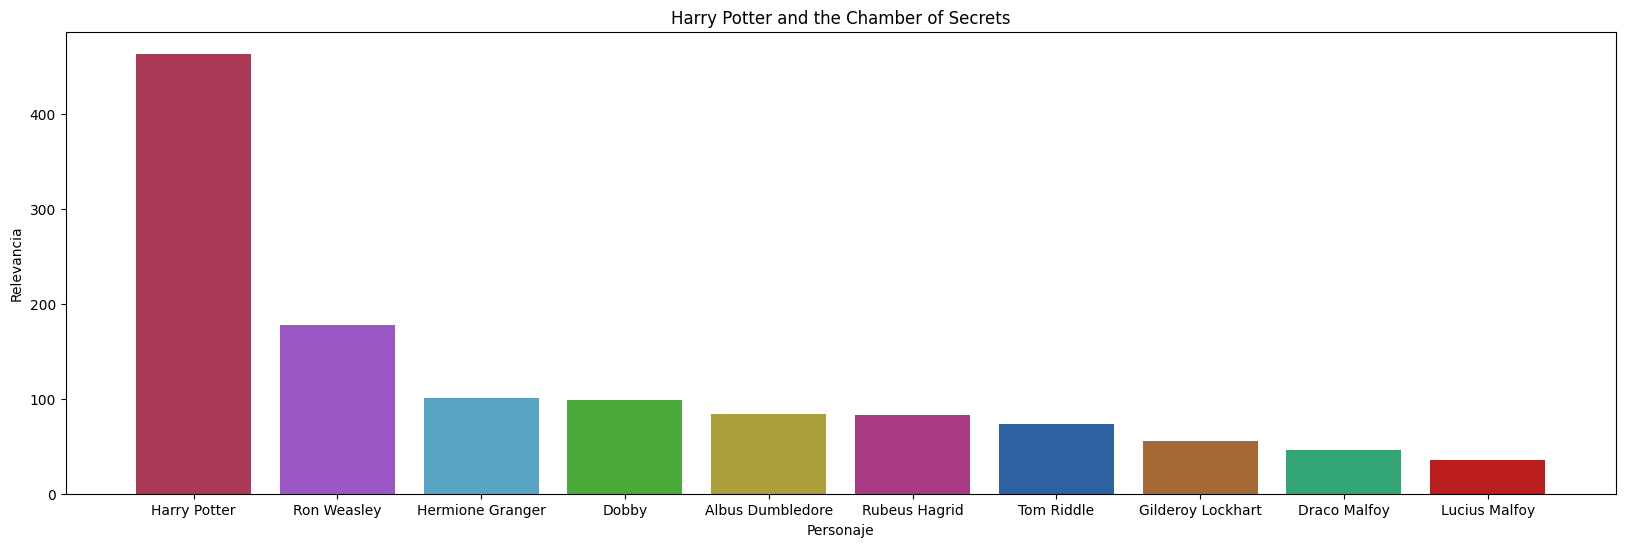

In [28]:
personajes = resultados_personajes['Personaje']
total = resultados_personajes['Total']

colores = ['#AA3A56', '#9B57C4', '#57A4C4', '#4AAA3A', '#AA9F3A', '#AA3A84', '#2E62A1', '#A66B34', '#34A676', '#BA1E1E']

plt.figure(figsize=(20, 6))
plt.bar(personajes, total, color=colores)


plt.xlabel('Personaje')
plt.ylabel('Relevancia')
plt.title("Harry Potter and the Chamber of Secrets")

plt.show()

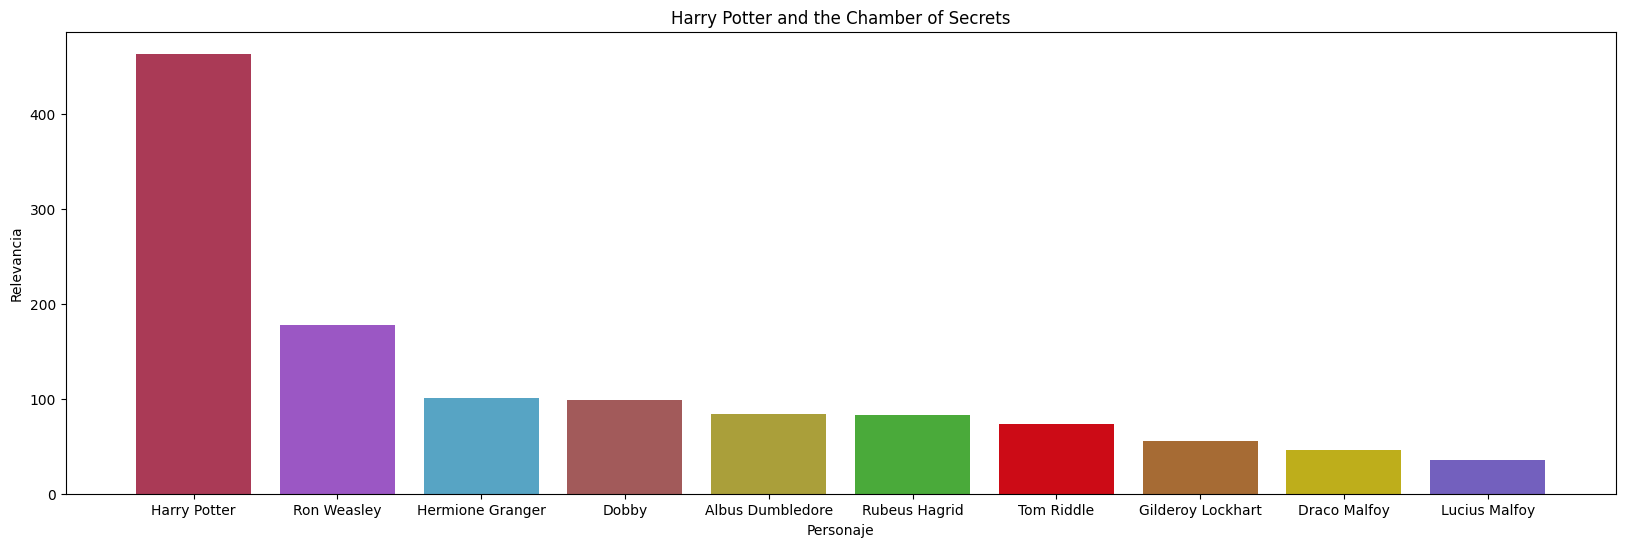

In [29]:
personajes = resultados_personajes['Personaje']
total = resultados_personajes['Total']

colores = ['#AA3A56', '#9B57C4', '#57A4C4', '#A25A5A', '#AA9F3A', '#4AAA3A', '#CC0B16', '#A66B34', '#BEAE1B', '#7360BE']

plt.figure(figsize=(20, 6))
plt.bar(personajes, total, color=colores)


plt.xlabel('Personaje')
plt.ylabel('Relevancia')
plt.title("Harry Potter and the Chamber of Secrets")

plt.show()

Sacamos cvs para no perder los datos

In [30]:
resultados_personajes.to_csv('csv/Personajes_relevantes/HP_2.csv', index=False)
